# <font color=blue>1° Problema de Negócio

# **Previsão de tarifa de voo usando aprendizado de máquina**

Você, como **Cientista de Dados da Área de inteligência de Mercado da Startup #VoeFácil** , precisa construir uma Máquina Preditiva de Preço de Passagens Aéreas para o App da Empresa.

> Para isso vc precisa analisar o conjunto de dados de tarifas de voo, usando técnicas essenciais de análise e processamento de dados, e, em seguida, fazer algumas previsões sobre o preço do voo, com base em alguns recursos (variáveis/features), como o tipo de companhia aérea, o horário de chegada, o que é a hora de partida, qual a duração do voo, origem, destino e muito mais.


# <font color=blue> 2° Análise Exploratória dos Dados

# **Conjunto de Dados**

**Companhia Aérea**: Esta coluna terá todos os tipos de companhias aéreas como Indigo, Jet Airways, Air India e muitas outras.

**Date_of_Journey**: Esta coluna nos informará sobre a data em que a viagem do passageiro começará.

**Fonte**: Esta coluna contém o nome do local de onde começará a viagem do passageiro.

**Destino**: Esta coluna contém o nome do local para onde os passageiros queriam viajar.

**Rota**: Aqui podemos saber qual é a rota pela qual os passageiros optaram por viajar desde a sua origem até ao seu destino.

**Arrival_Time**: A hora de chegada é quando o passageiro chegará ao seu destino.

**Duração**: Duração é todo o período de tempo que um voo levará para completar sua jornada da origem ao destino.

**Total_Stops**: Isso nos informará em quantos lugares os voos vão parar lá para o voo em toda a viagem.

**Additional_Info**: Nesta coluna, obteremos informações sobre comida, tipo de comida e outras comodidades.

**Preço**: Preço do voo para uma viagem completa incluindo todas as despesas antes do embarque.

In [1]:
# Importação de Pacotes para o trabalho
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [2]:
# Conexão com os dados
train_df = pd.read_excel("Data_Train.xlsx")
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [3]:
# Agora, aqui estaremos olhando para o tipo de colunas que nosso conjunto de dados tem
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [4]:
# Aqui podemos obter mais informações sobre nosso conjunto de dados
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# Estatísticas das variáveis
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
# Verifica valores Missing
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# Elimina valores Missing
train_df.dropna(inplace = True)

In [8]:
# Verifica eliminação
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
# Verifica valores  Duplicados
train_df[train_df.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [10]:
# Elimina valor duplicado mantendo o 1° registro.
train_df.drop_duplicates(keep='first',inplace=True)

In [11]:
# Verifica eliminação
train_df[train_df.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [12]:
# Verifica dimensoes do dataset
train_df.shape

(10462, 11)

In [13]:
# Tabela de frequencia da variável "Additional_Info"
train_df["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [14]:
train_df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [15]:
# Verifica valores únicos para a variável  'Airline'
train_df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [16]:
# Checando as diferentes rotas das companhias 
train_df["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

#Atenção

Geralmente, em competições de Machine Learning, são disponibilizados 2 datasets:

**1** para vc treinar e testar a Máquina Preditiva

**1** para vc usar depois que vc finalizar sua MP. 

Ou seja:


Vc usa o dataset de teste para fazer as predições e submeter para o site de competição avaliar sua performance.

In [17]:
# Agora vamos ver nosso conjunto de dados de teste
test_df = pd.read_excel("Test_set.xlsx")
test_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [18]:
# Estatísticas
test_df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [19]:
# Informações adicionais do dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


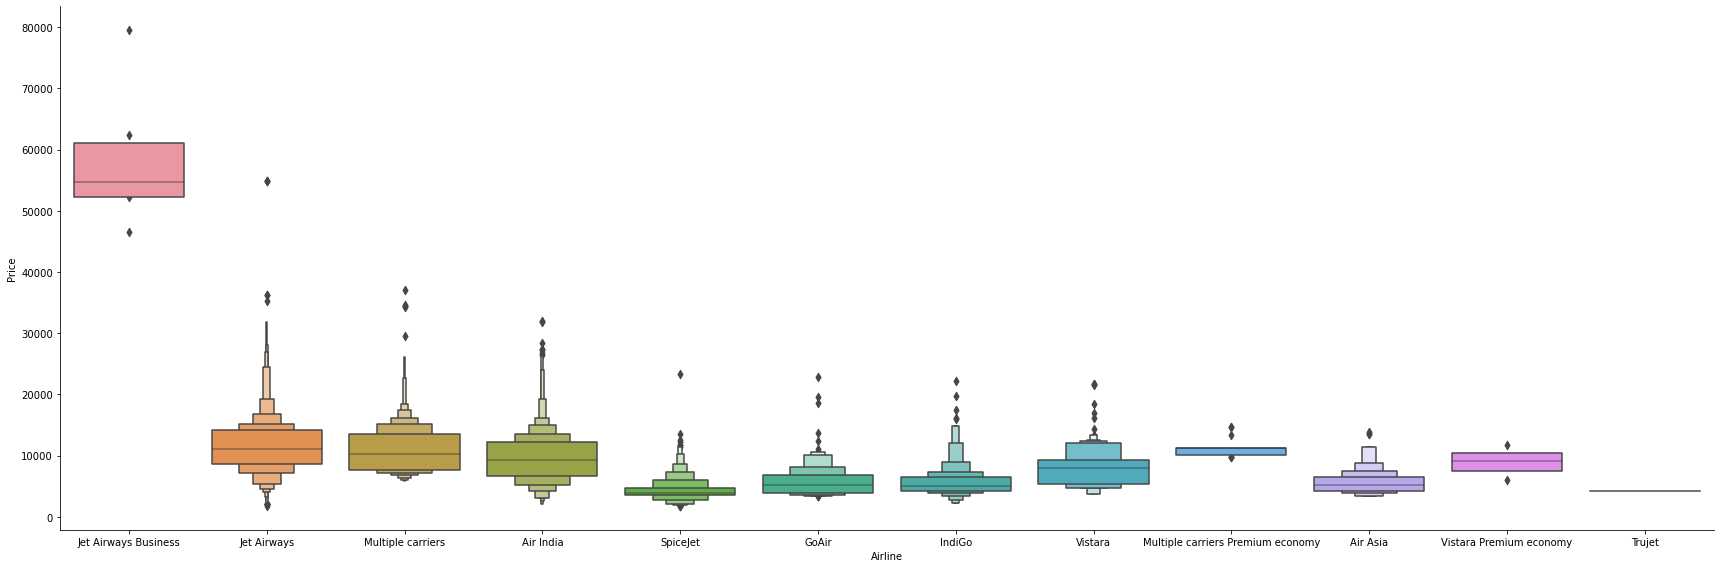

In [20]:
# Plotting Price vs Airline 
sns.catplot(y = "Price", x = "Airline", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

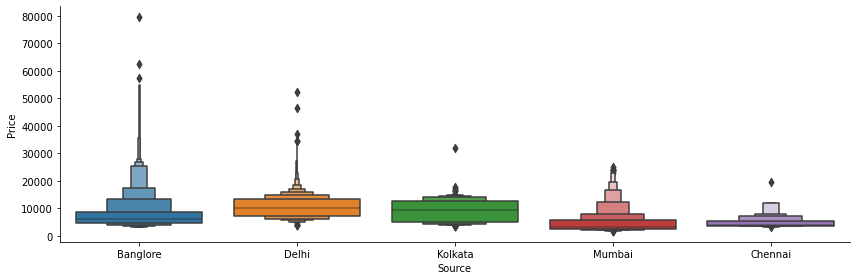

In [21]:
# Plotting Violin plot for Price vs Source
sns.catplot(y = "Price", x = "Source", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

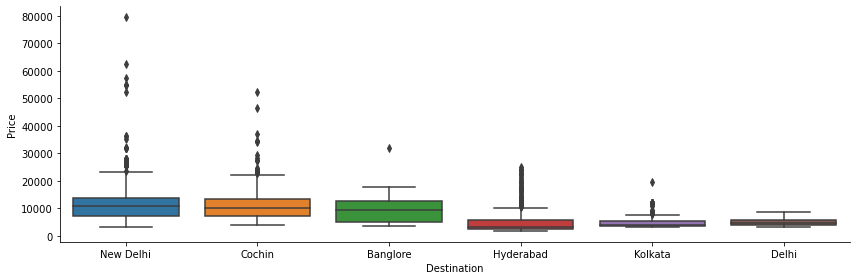

In [22]:
# Plotting Box plot for Price vs Destination
sns.catplot(y = "Price", x = "Destination", data = train_df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

# <font color=blue>3° Processamento dos Dados

In [23]:
train_df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [24]:
# Convertendo a variável Duration em horas e minutos

train_df['Duration'] = train_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_df['Duration'] = test_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [25]:
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662


In [26]:
# Date_of_Journey
train_df["Journey_day"] = train_df['Date_of_Journey'].str.split('/').str[0].astype(int)
train_df["Journey_month"] = train_df['Date_of_Journey'].str.split('/').str[1].astype(int)
train_df.drop(["Date_of_Journey"], axis = 1, inplace = True)



In [27]:
train_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5


In [28]:
# Dep_Time
train_df["Dep_hour"] = pd.to_datetime(train_df["Dep_Time"]).dt.hour
train_df["Dep_min"] = pd.to_datetime(train_df["Dep_Time"]).dt.minute
train_df.drop(["Dep_Time"], axis = 1, inplace = True)



In [29]:
train_df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,170,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,445,2 stops,No info,7662,1,5,5,50


In [30]:
# Arrival_Time
train_df["Arrival_hour"] = pd.to_datetime(train_df.Arrival_Time).dt.hour
train_df["Arrival_min"] = pd.to_datetime(train_df.Arrival_Time).dt.minute
train_df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [31]:
train_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15


### **Obs: Mesmo processamento feito nos dados de treino deve ser feito nos dados de teste (ou validação da competição)**

In [32]:
# Date_of_Journey
test_df["Journey_day"] = test_df['Date_of_Journey'].str.split('/').str[0].astype(int)
test_df["Journey_month"] = test_df['Date_of_Journey'].str.split('/').str[1].astype(int)
test_df.drop(["Date_of_Journey"], axis = 1, inplace = True)



In [33]:
# Dep_Time
test_df["Dep_hour"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour
test_df["Dep_min"] = pd.to_datetime(test_df["Dep_Time"]).dt.minute
test_df.drop(["Dep_Time"], axis = 1, inplace = True)



In [34]:
# Arrival_Time
test_df["Arrival_hour"] = pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df["Arrival_min"] = pd.to_datetime(test_df.Arrival_Time).dt.minute
test_df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Duration         10462 non-null  int64 
 5   Total_Stops      10462 non-null  object
 6   Additional_Info  10462 non-null  object
 7   Price            10462 non-null  int64 
 8   Journey_day      10462 non-null  int32 
 9   Journey_month    10462 non-null  int32 
 10  Dep_hour         10462 non-null  int64 
 11  Dep_min          10462 non-null  int64 
 12  Arrival_hour     10462 non-null  int64 
 13  Arrival_min      10462 non-null  int64 
dtypes: int32(2), int64(6), object(6)
memory usage: 1.1+ MB


In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Route            2671 non-null   object
 4   Duration         2671 non-null   int64 
 5   Total_Stops      2671 non-null   object
 6   Additional_Info  2671 non-null   object
 7   Journey_day      2671 non-null   int32 
 8   Journey_month    2671 non-null   int32 
 9   Dep_hour         2671 non-null   int64 
 10  Dep_min          2671 non-null   int64 
 11  Arrival_hour     2671 non-null   int64 
 12  Arrival_min      2671 non-null   int64 
dtypes: int32(2), int64(5), object(6)
memory usage: 250.5+ KB


Text(0, 0.5, 'Quantidade de voos')

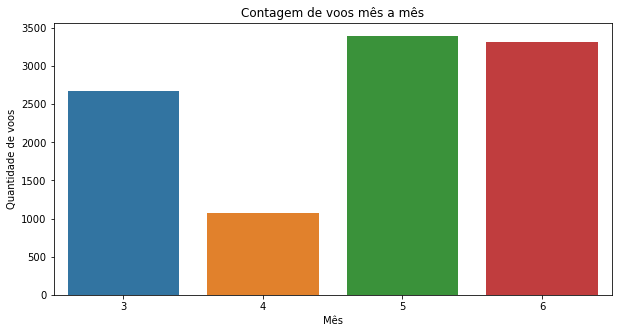

In [37]:
# Plotting Bar chart for Months (Duration) vs Number of Flights
plt.figure(figsize = (10, 5))
plt.title('Contagem de voos mês a mês')
ax=sns.countplot(x = 'Journey_month', data = train_df)
plt.xlabel('Mês')
plt.ylabel('Quantidade de voos')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

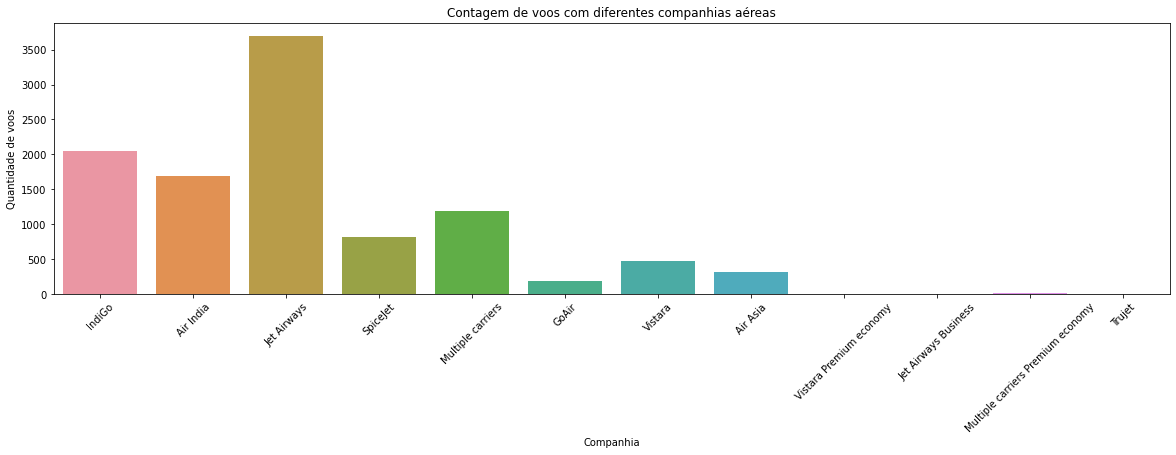

In [38]:
# Plotting Bar chart for Types of Airline vs Number of Flights
plt.figure(figsize = (20,5))
plt.title('Contagem de voos com diferentes companhias aéreas')
ax=sns.countplot(x = 'Airline', data =train_df)
plt.xlabel('Companhia')
plt.ylabel('Quantidade de voos')
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

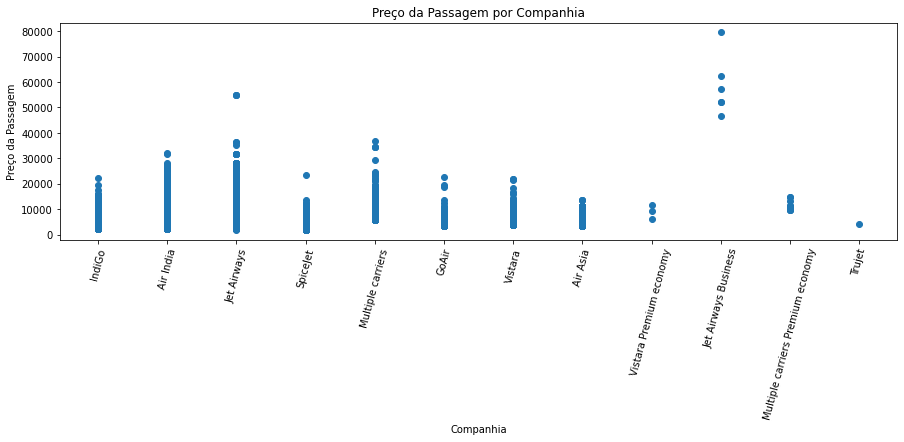

In [39]:
# Plotting Ticket Prices VS Airlines
plt.figure(figsize = (15,4))
plt.title('Preço da Passagem por Companhia')
plt.scatter(train_df['Airline'], train_df['Price'])
plt.xticks
plt.xlabel('Companhia')
plt.ylabel('Preço da Passagem')
plt.xticks(rotation = 75)

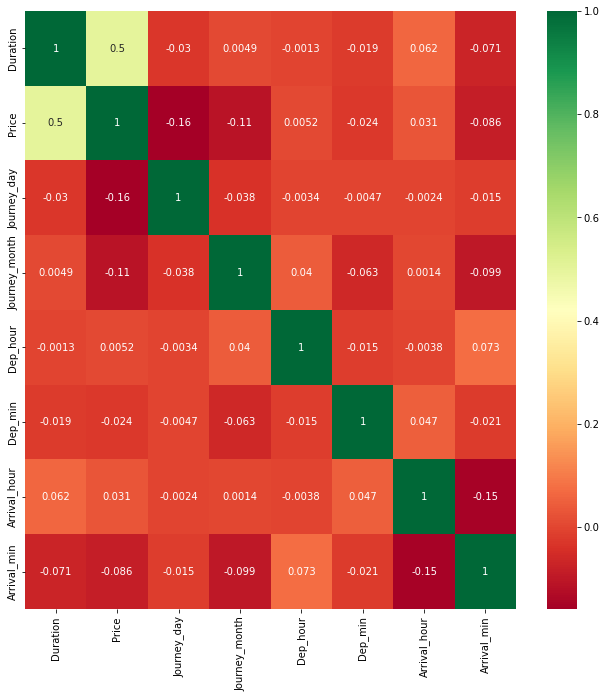

In [40]:
# Plotting Correation
plt.figure(figsize = (11,11))
sns.heatmap(train_df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [41]:
# Dropping the Price
data = train_df.drop(["Price"], axis=1)

In [42]:
# Categorical Data and Numerical Data
train_categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

test_categorical_data = test_df.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_numerical_data  = test_df.select_dtypes(include=['int64', 'float','int32'])

In [43]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [44]:
# Label Encode and Hot Encode for Categorical Columns
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
test_categorical_data = test_categorical_data.apply(LabelEncoder().fit_transform)

In [45]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,3,0,5,18,4,8
1,1,3,0,84,1,8
2,4,2,1,118,1,8
3,3,3,0,91,0,8
4,3,0,5,29,0,8


In [46]:
# Concatenating both Catagorical Data and Numerical Data
X = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y = train_df['Price']
test_set = pd.concat([test_categorical_data, test_numerical_data], axis=1)
X.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,4,8,170,24,3,22,20,1,10
1,1,3,0,84,1,8,445,1,5,5,50,13,15
2,4,2,1,118,1,8,1140,9,6,9,25,4,25
3,3,3,0,91,0,8,325,12,5,18,5,23,30
4,3,0,5,29,0,8,285,1,3,16,50,21,35


In [47]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [48]:
# Calculating Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred): 

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [49]:
# Separação dos dados de treino e teste para a MP
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [50]:
print("O tamanho da base de treinamento (entrada): ", X_train.shape)
print("O tamanho da base de treinamento (saída): ", y_train.shape)
print("O tamanho da base de teste (entrada): ", X_test.shape)
print("O tamanho da base de teste (saída): ", y_test.shape)

O tamanho da base de treinamento (entrada):  (7323, 13)
O tamanho da base de treinamento (saída):  (7323,)
O tamanho da base de teste (entrada):  (3139, 13)
O tamanho da base de teste (saída):  (3139,)


#<font color=red>  4° Construção de Máquinas Preditivas 

> # Validação Cruzada
> ## Uma maneira de melhorar a Performance da sua Máquina Preditiva


![](https://i.stack.imgur.com/padg4.gif)

In [51]:
# Performing GridSearchCV on Decision Tree Regression
depth = list(range(1,11))
param_grid = dict(max_depth = depth)


In [52]:
# Lista o Grid de Parâmetro
param_grid

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [53]:
# Lista os Hyperparâmetros da MP
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [54]:
# Predicting train and test results
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [55]:
# Qual foi o melhor valor do Hyperparâmretro da lista de 1 a 10 (max_depth)?
tree.best_params_

{'max_depth': 9}

### Avaliando com dados de Treino

In [56]:
# Printando as Métricas de Avaliação da MP com dados de treino
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R²: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  1480.4671369597863
Mean Absolute % Error:  12
R-Squared:  0.8958056422700569


### Avalia com dados de Teste

In [57]:
# Printando as Métricas de Avaliação da MP com dados de teste
print("Test Results for Decision Tree Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
Root Mean Squared Error:  2111.0330414609107
Mean Absolute % Error:  14
R-Squared:  0.7992850083559194


## Fim!
